# Matplotlib Practice

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [35]:
 #Import the 'data/car-sales.csv' into a DataFame called car_sales and view
car_sales = pd.read_csv("data/car-sales.csv")
car_sales.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


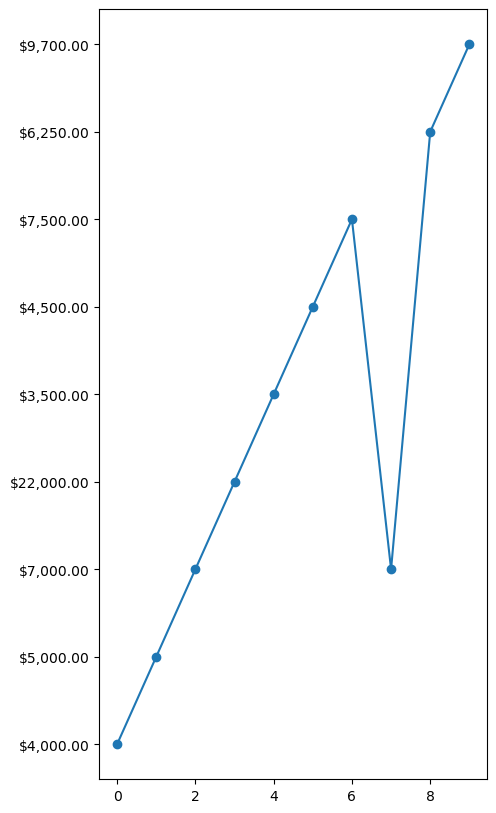

In [7]:
# Try to plot the 'Price' column using the plot() function
plt.figure(figsize=(5,10))
plt.plot(car_sales["Price"] , marker='o' ,linestyle='-')
plt.show()

Why doesn't it work?

Hint: It's not numeric data.

In the process of turning it to numeric data, let's create another column which adds the total amount of sales and another one which shows what date the car was sold.

Hint: To add a column up cumulatively, look up the cumsum() function. And to create a column of dates, look up the date_range() function.

In [9]:

#make sure price column is string first
car_sales["Price"] = car_sales["Price"].astype(str)

# Remove $, commas, and any extra spaces
car_sales["Price"] = (
    car_sales["Price"]
    .str.replace(r'[\$,]', '', regex=True)  # Remove $ and ,
    .str.replace(r'\.00', '', regex=True)  # Remove .00 at the end
    .str.replace(r'\s+', '', regex=True)  # Remove any extra spaces inside numbers
)

# Convert the cleaned Price column to float
car_sales["Price"] = pd.to_numeric(car_sales["Price"], errors='coerce')

# Display the first few rows and check the data type
print(car_sales.head())
print(car_sales.dtypes)


     Make Colour  Odometer (KM)  Doors  Price
0  Toyota  White         150043      4   4000
1   Honda    Red          87899      4   5000
2  Toyota   Blue          32549      3   7000
3     BMW  Black          11179      5  22000
4  Nissan  White         213095      4   3500
Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object


In [11]:
# Add a column called 'Total Sales' to car_sales which cumulatively adds the 'Price' column
car_sales["Total Sales"] = car_sales["Price"].cumsum()
# Add a column called 'Sale Date' which lists a series of successive dates starting from today (your today)
from datetime import datetime
start_date = datetime.today().date()  # Get today's date
car_sales["Sale Date"] = pd.date_range(start=start_date, periods=len(car_sales), freq='D')

# Generate a series of successive dates starting from today
start_date = datetime.today().date()  # Get today's date
# View the car_sales DataFrame
print(car_sales)


     Make Colour  Odometer (KM)  Doors  Price  Total Sales  Sale Date
0  Toyota  White         150043      4   4000         4000 2025-03-14
1   Honda    Red          87899      4   5000         9000 2025-03-15
2  Toyota   Blue          32549      3   7000        16000 2025-03-16
3     BMW  Black          11179      5  22000        38000 2025-03-17
4  Nissan  White         213095      4   3500        41500 2025-03-18
5  Toyota  Green          99213      4   4500        46000 2025-03-19
6   Honda   Blue          45698      4   7500        53500 2025-03-20
7   Honda   Blue          54738      4   7000        60500 2025-03-21
8  Toyota  White          60000      4   6250        66750 2025-03-22
9  Nissan  White          31600      4   9700        76450 2025-03-23


Now we've got a numeric column (`Total Sales`) and a dates column (`Sale Date`), let's visualize them.

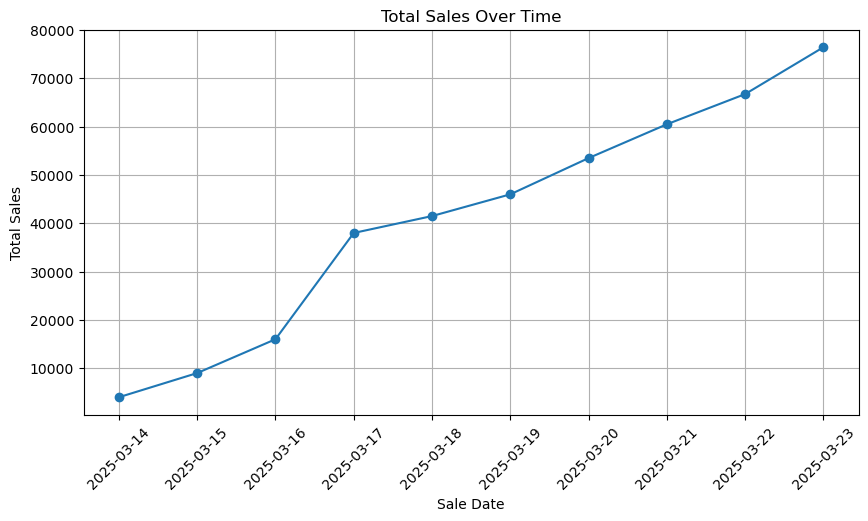

In [13]:
# Use the plot() function to plot the 'Sale Date' column versus the 'Total Sales' column
plt.figure(figsize=(10, 5))
plt.plot(car_sales['Sale Date'], car_sales['Total Sales'], marker='o', linestyle='-')


plt.xlabel('Sale Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()

plt.show()

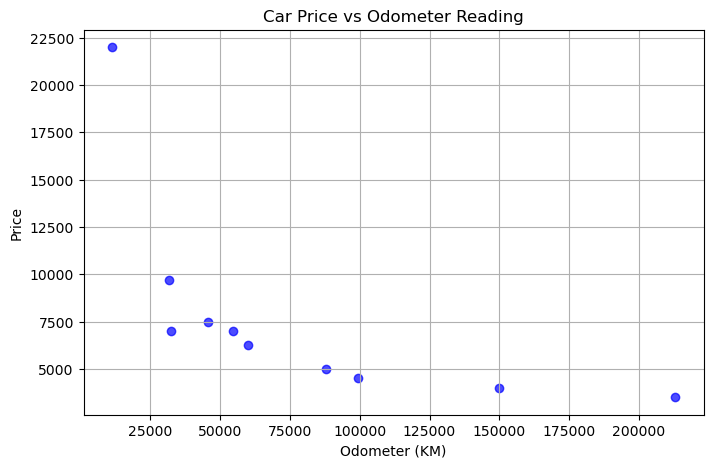

In [21]:
# Convert the 'Price' column to the integers

car_sales['Price'] = car_sales['Price'].astype(int)

# Create a scatter plot of the 'Odometer (KM)' and 'Price' column using the plot() function
plt.figure(figsize=(8, 5))
plt.scatter(car_sales['Odometer (KM)'], car_sales['Price'], color='blue', alpha=0.7)

plt.xlabel('Odometer (KM)')
plt.ylabel('Price')
plt.title('Car Price vs Odometer Reading')

plt.grid()
plt.show()


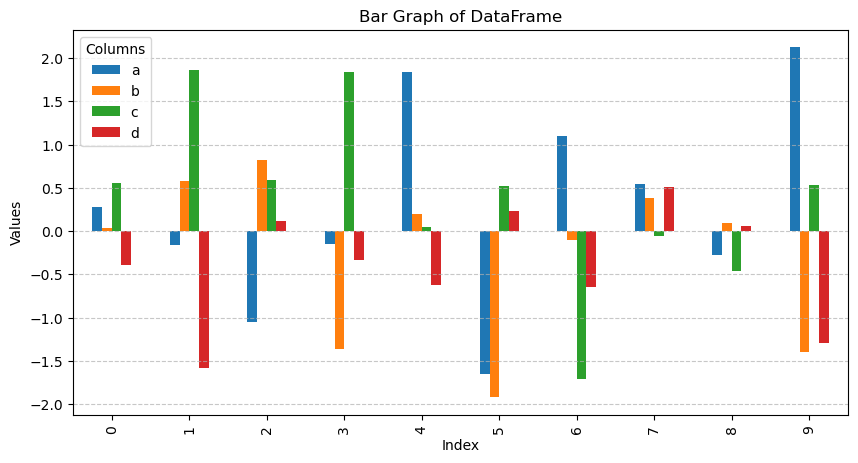

In [17]:
# Create a NumPy array of random numbers of size (10, 4) and save it to X

X = np.random.randn(10, 4)

# Turn the NumPy array X into a DataFrame with columns called ['a', 'b', 'c', 'd']
df = pd.DataFrame(X, columns=['a', 'b', 'c', 'd'])

# Create a bar graph of the DataFrame
df.plot(kind='bar', figsize=(10, 5))

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Bar Graph of DataFrame')

plt.legend(title='Columns')  # Add legend title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()

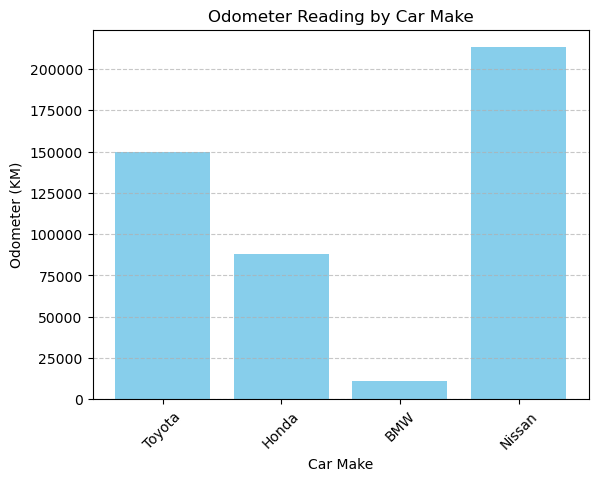

In [19]:
# Create a bar graph of the 'Make' and 'Odometer (KM)' columns in the car_sales DataFram
plt.bar(car_sales['Make'], car_sales['Odometer (KM)'], color='skyblue')
plt.xlabel('Car Make')
plt.ylabel('Odometer (KM)')
plt.title('Odometer Reading by Car Make')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

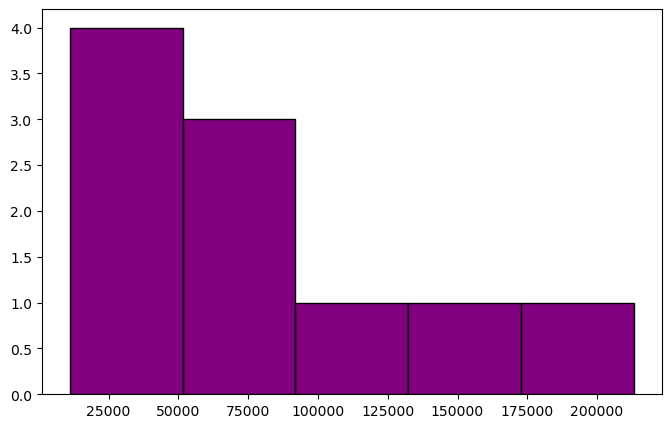

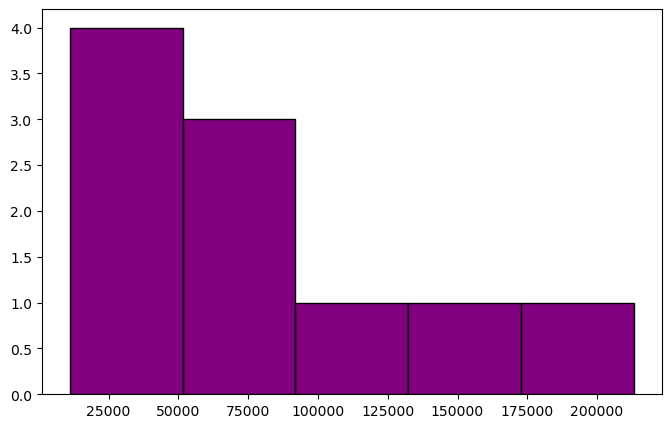

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(car_sales['Odometer (KM)'], bins=5, color='purple', edgecolor='black')
plt.show()

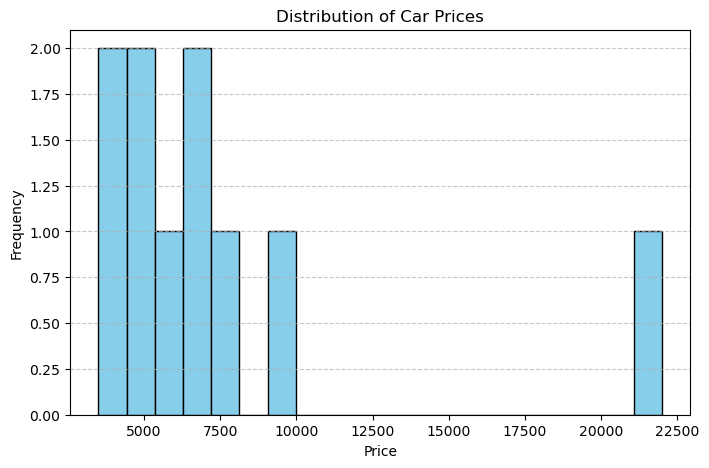

In [27]:
# Create a histogram of the 'Price' column with 20 bins
plt.figure(figsize=(8, 5))
plt.hist(car_sales['Price'], bins=20, color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Now we've seen a few examples of plotting directly from DataFrames using the `car_sales` dataset.

Let's try using a different dataset.

In [67]:
# Import "data/heart-disease.csv" and save it to the variable "heart_disease"
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# View the first 10 rows of the heart_disease DataFrame
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


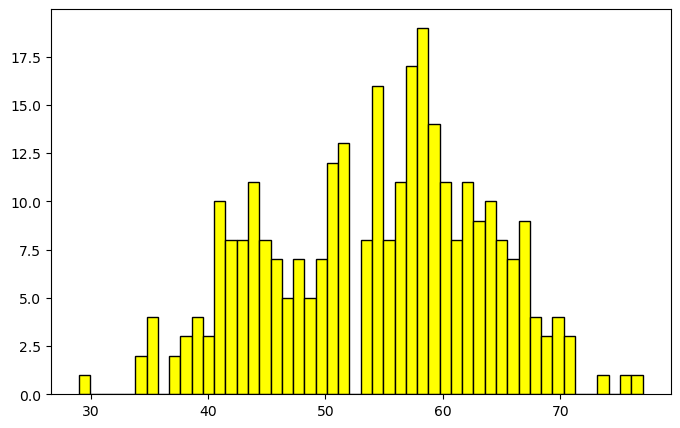

In [69]:
# Create a histogram of the "age" column with 50 bins
plt.figure(figsize=(8, 5))
plt.hist(heart_disease['age'], bins=50, color='yellow', edgecolor='black')
plt.show()

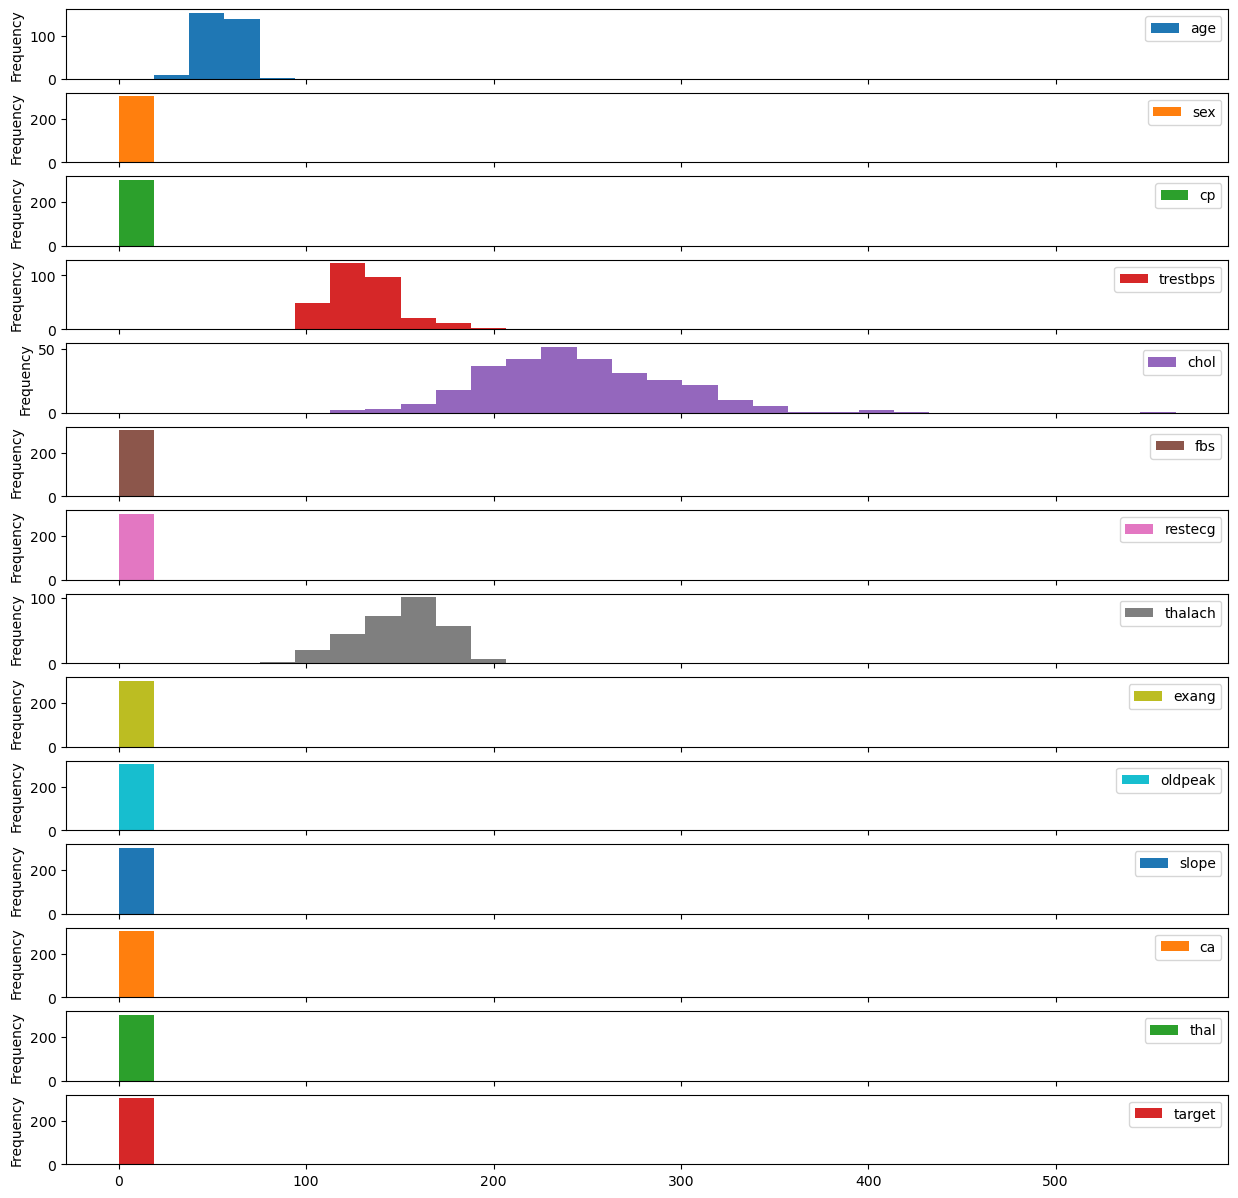

In [57]:
# Call plot.hist() on the heart_disease DataFrame and toggle the
# "subplots" parameter to True
# Plot histograms for all numerical columns as subplots
heart_disease.plot.hist(figsize=(15, 15), subplots=True, bins=30)

plt.show()

That plot looks pretty squished. Let's change the figsize.

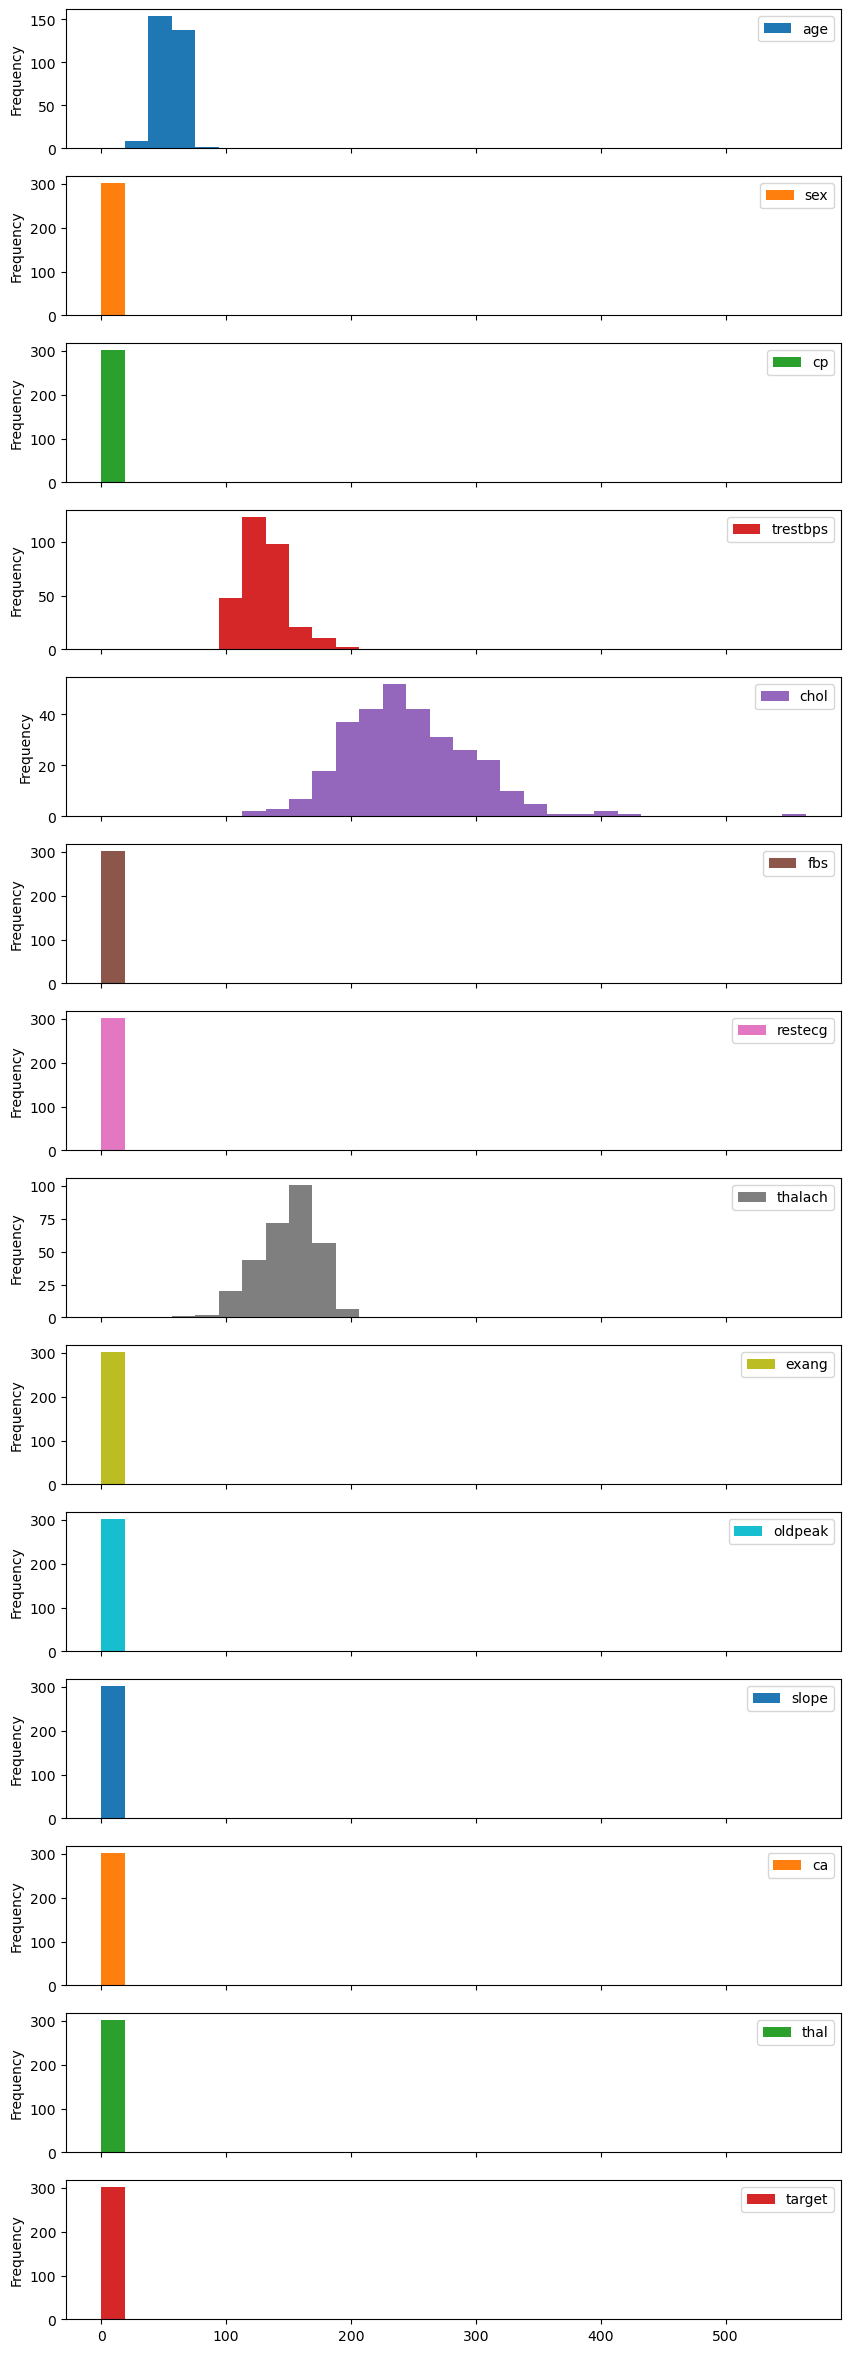

In [71]:
# Call the same line of code from above except change the "figsize" parameter
# to be (10, 30)
heart_disease.plot.hist(figsize=(10, 30), subplots=True, bins=30)

plt.show()

Now let's try comparing two variables versus the target variable.

More specifially we'll see how age and cholesterol combined effect the target in **patients over 50 years old**.

For this next challenge, we're going to be replicating the following plot:

<img src="images/matplotlib-heart-disease-chol-age-plot.png"/>

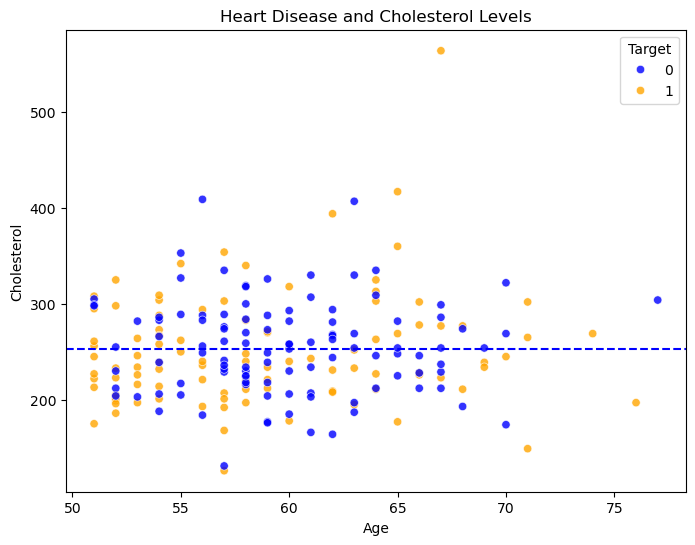

In [93]:
# Filter patients over 50 years old
df_over_50 = heart_disease[heart_disease['age'] > 50]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the data, color by 'target'
sns.scatterplot(
    x=df_over_50['age'], 
    y=df_over_50['chol'], 
    hue=df_over_50['target'], 
    palette={0: 'blue', 1: 'orange'}, 
    alpha=0.8
)

# Customize the plot
plt.title('Heart Disease and Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Target')

# Add a mean cholesterol level line
mean_cholesterol = df_over_50['chol'].mean()
plt.axhline(mean_cholesterol, color='blue', linestyle='dashed')

# Show the plot
plt.show()

Beatiful, now you've created a plot of two different variables, let's change the style.

In [95]:
# Check what styles are available under plt
plt.style.available  # This will list all available styles

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [99]:
# Change the style to use "seaborn-whitegrid"
sns.set_style("whitegrid")

Now the style has been changed, we'll replot the same figure from above and see what it looks like.

If you've changed the style correctly, it should look like the following:
<img src="images/matplotlib-heart-disease-chol-age-plot-seaborn-whitegrid.png"/>


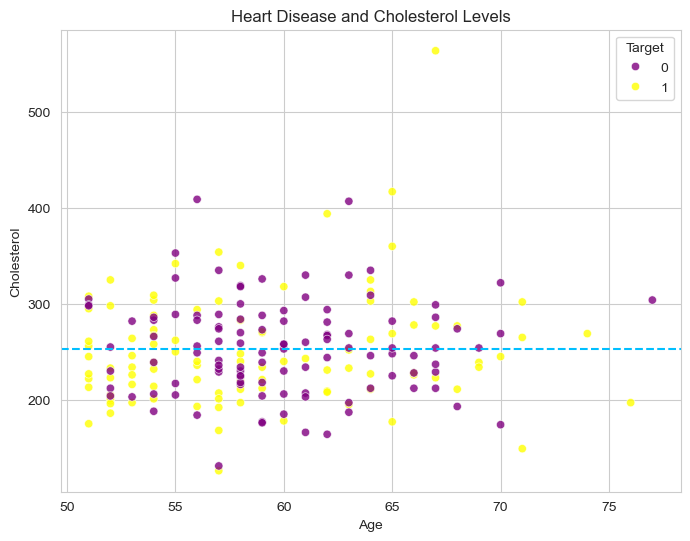

In [101]:
# Reproduce the same figure as above with the "seaborn-whitegrid" style


# Filter patients over 50 years old
df_over_50 = heart_disease[heart_disease['age'] > 50]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the data with correct colors
sns.scatterplot(
    x=df_over_50['age'], 
    y=df_over_50['chol'], 
    hue=df_over_50['target'], 
    palette={0: 'purple', 1: 'yellow'}, 
    alpha=0.8
)

# Customize the plot
plt.title('Heart Disease and Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Target')

# Add a mean cholesterol level line
mean_cholesterol = df_over_50['chol'].mean()
plt.axhline(mean_cholesterol, color='deepskyblue', linestyle='dashed')

# Show the plot
plt.show()

Wonderful, you've changed the style of the plots and the figure is looking different but the dots aren't a very good colour.

Let's change the `cmap` parameter of `scatter()` as well as the `color` parameter of `axhline()` to fix it.

Completing this step correctly should result in a figure which looks like this:
<img src="images/matplotlib-heart-disease-chol-age-plot-cmap-change.png"/>

<Figure size 800x600 with 0 Axes>

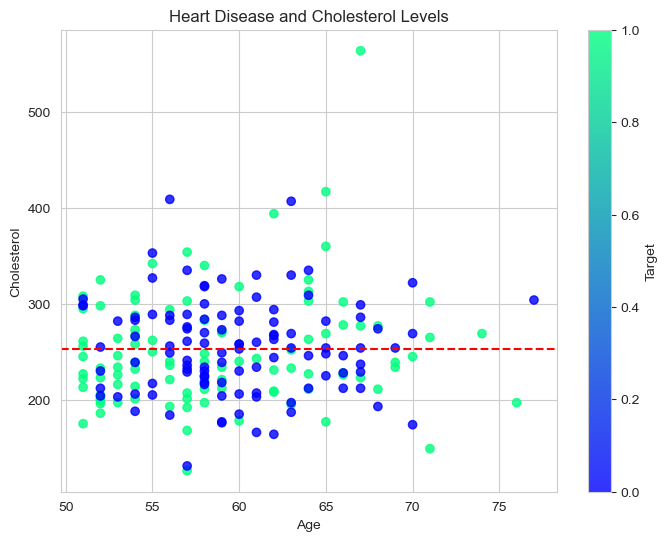

In [105]:

# Filter patients over 50 years old
df_over_50 = heart_disease[heart_disease['age'] > 50]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the data using cmap='winter' for better color contrast
scatter = plt.scatter(
    df_over_50['age'], 
    df_over_50['chol'], 
    c=df_over_50['target'], 
    cmap="winter",  # Changes the color mapping
    alpha=0.8
)

# Add a color legend
plt.colorbar(scatter, label="Target")

# Customize the plot
plt.title('Heart Disease and Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# Add a mean cholesterol level line in red
mean_cholesterol = df_over_50['chol'].mean()
plt.axhline(mean_cholesterol, color='red', linestyle='dashed')

# Show the plot
plt.show()

Beautiful! Now our figure has an upgraded color scheme let's save it to file.

In [109]:
# Save the current# Save the figure
plt.savefig("heart_disease_plot.png", dpi=300, bbox_inches="tight")
 

In [111]:
# Reset the figure by calling plt.subplots()
plt.subplots()

(<Figure size 640x480 with 1 Axes>, <Axes: >)